In [1]:
import pandas as pd
import numpy as np
from utils import reduction_function as rfun
from utils import polarization_function as pfun
import networkx as nx
import csv 
import matplotlib.pyplot as plt
from scipy import stats

/home/jnye/miniconda3/envs/bach_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
june_df = pd.read_csv("../output_network/stance_df_june.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )
dec_df = pd.read_csv("../output_network/stance_df_december.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

### Distribution of each topic stance for each month

In [3]:
def plot_c_subplot(df, color_topics, month, n_bins = 30, num_plots = 3):
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)

    for i in range(num_plots):
        topic = color_topics[i]
        axes[i].hist(df[topic], bins = n_bins)
 
        axes[i].set_xlabel('user stance')
        axes[i].set_ylabel('frequency')

        axes[i].set_title(f'Distribution of {topic} in {month}')
 
    plt.tight_layout()
    plt.show()

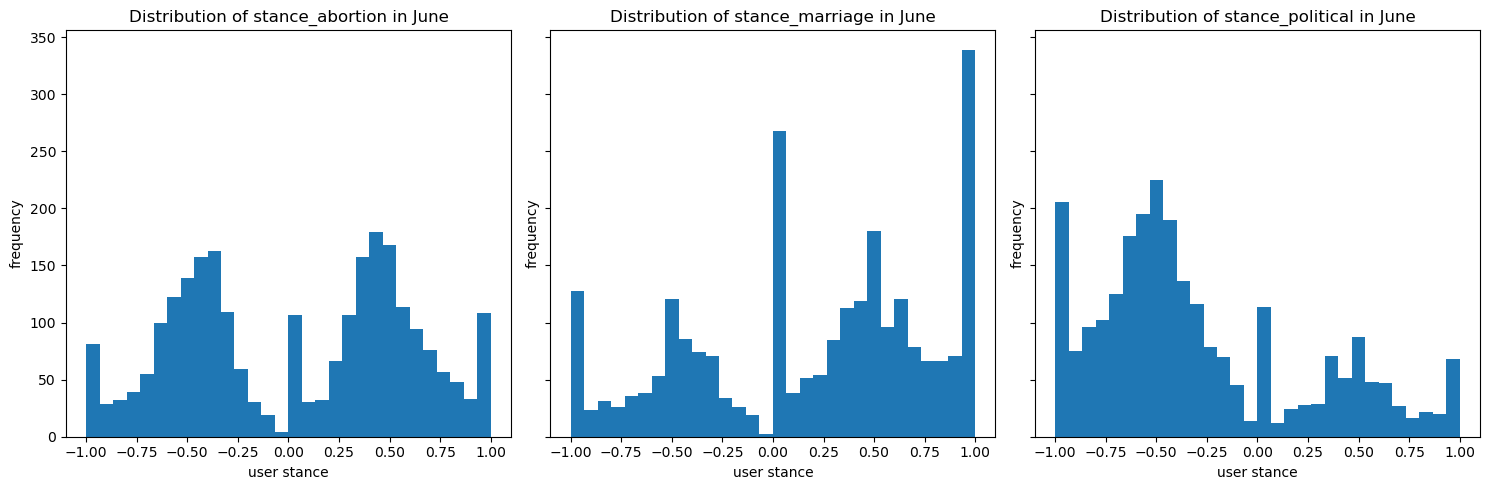

In [4]:
plot_c_subplot(june_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "June")

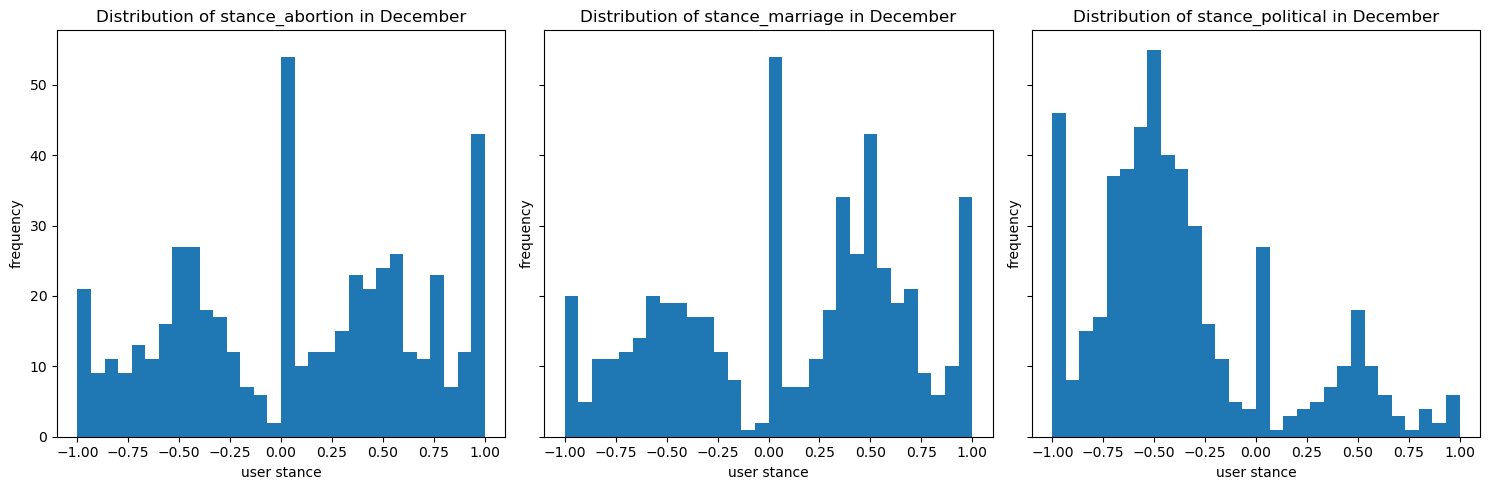

In [5]:
plot_c_subplot(dec_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "December")

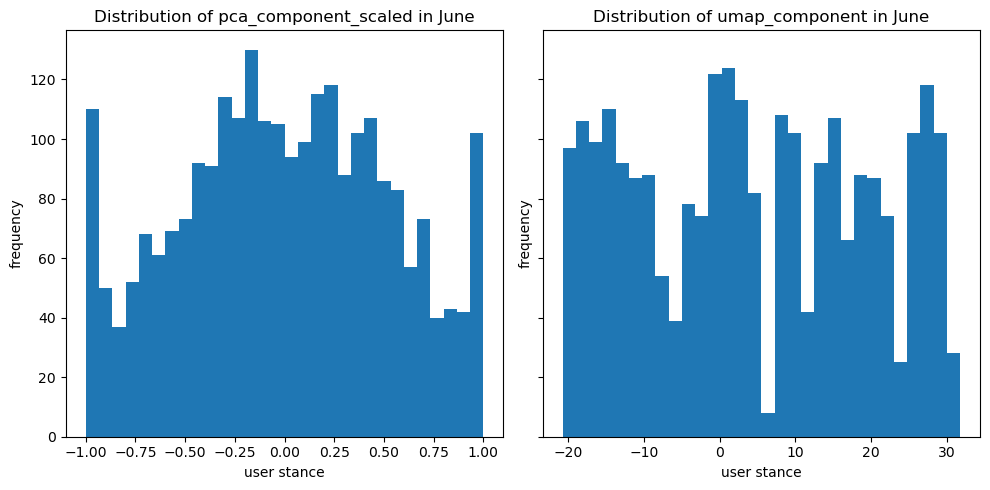

In [6]:
plot_c_subplot(june_df, ["pca_component_scaled", "umap_component"], month = "June", num_plots=2)

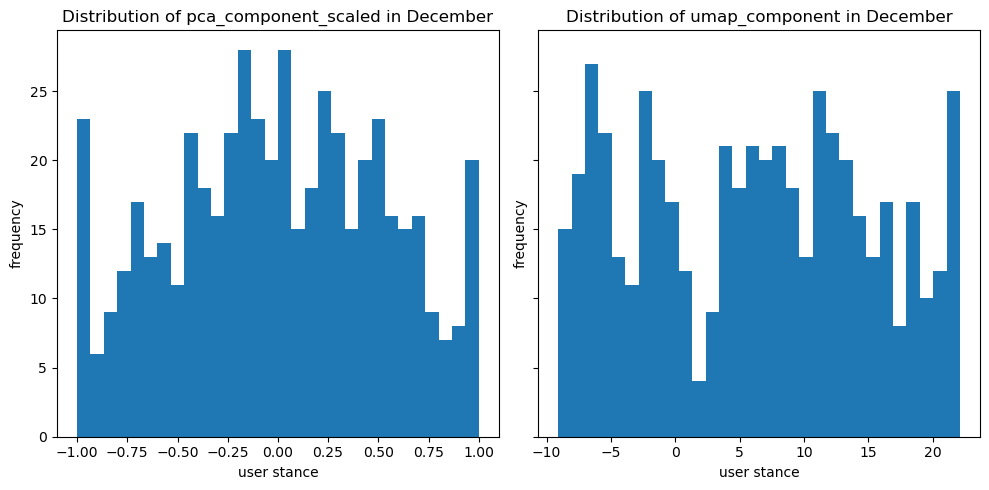

In [7]:
plot_c_subplot(dec_df, ["pca_component_scaled", "umap_component"], month = "December", num_plots=2)

### Same plots, but colored by stance score

Number of bins was set to 30!!

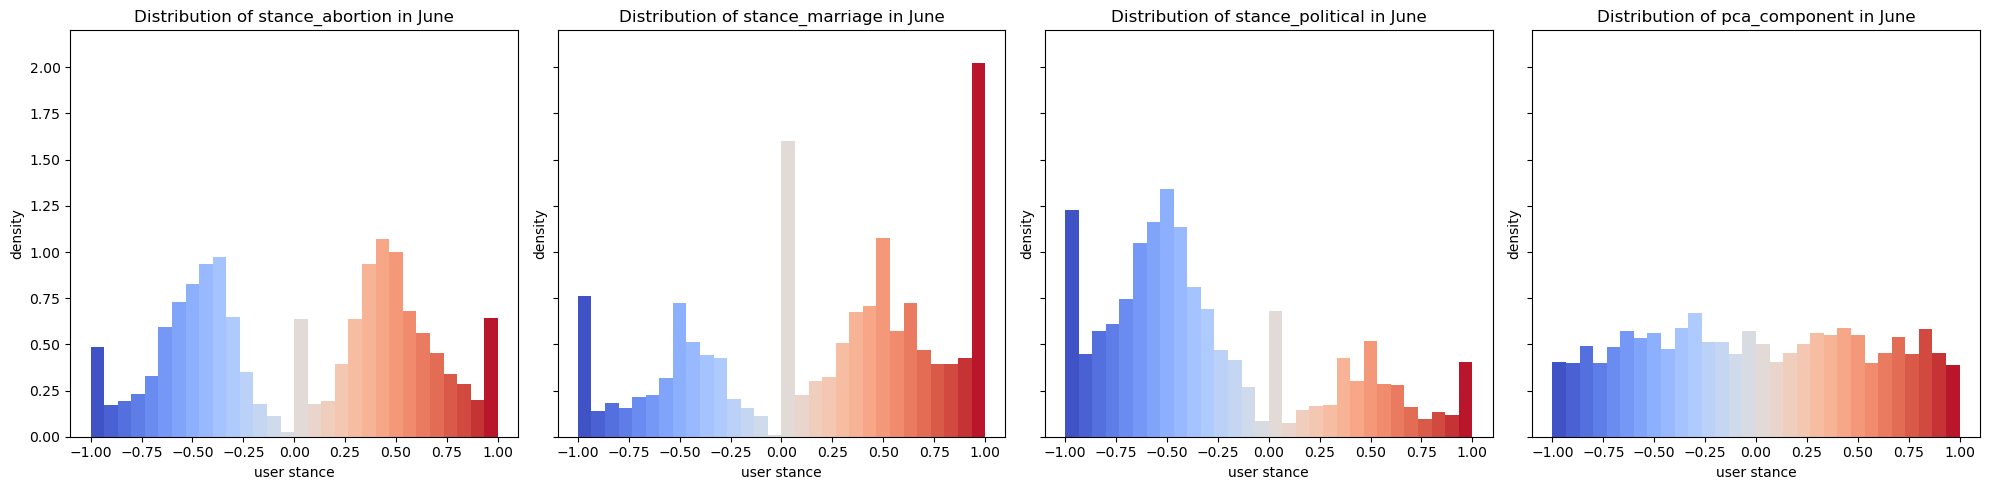

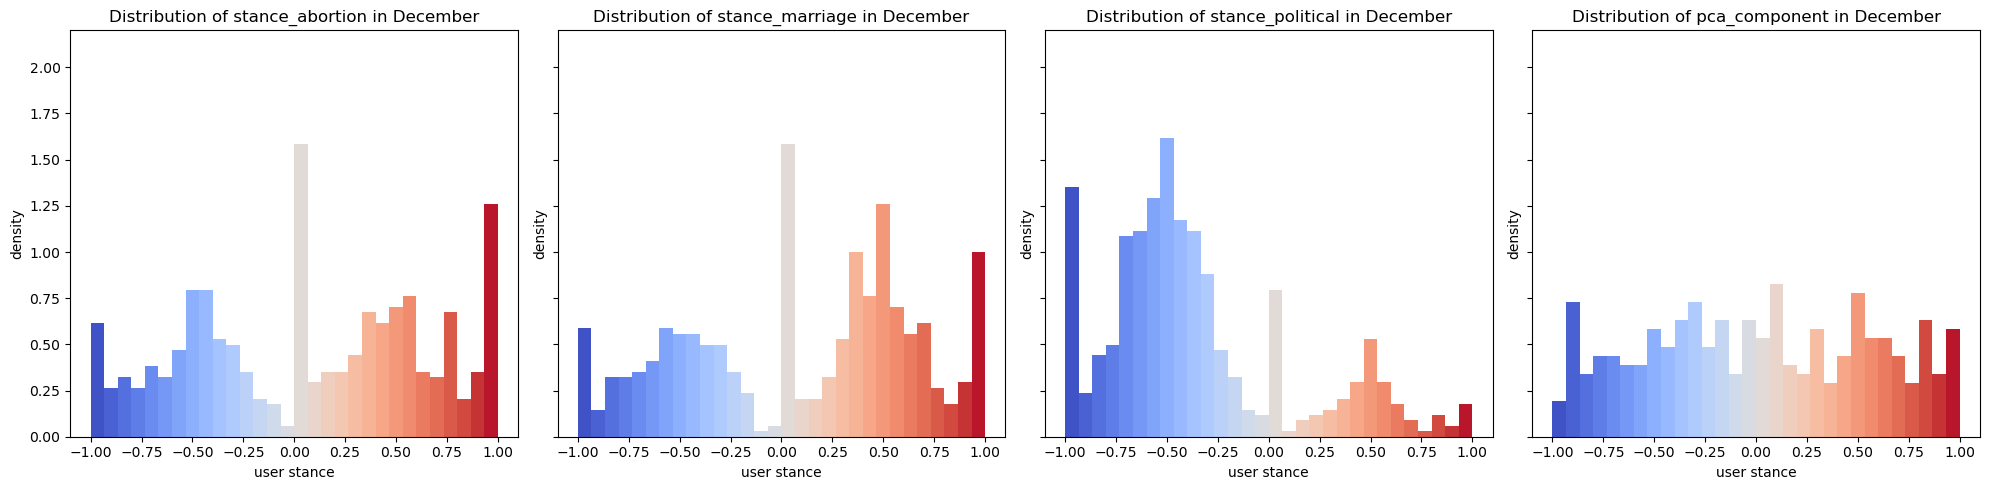

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_c_subplot_colored(df, color_topics, month, n_bins=30, num_plots=3, y_lim = 2.2):
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)
    if num_plots == 1:
        axes = [axes]

    for i in range(num_plots):
        topic = color_topics[i]
        
        # calculate the histogram values
        n, bins, patches = axes[i].hist(df[topic], bins=n_bins, range=(-1, 1), density = True)

        # normalize the values to the range [-1, 1]
        norm = plt.Normalize(vmin=-1, vmax=1)

        # create a colormap (from blue to red)
        cmap = plt.get_cmap('coolwarm')

        # color each bar based on its value
        for patch, bin_edge in zip(patches, bins[:-1]):  # Iterate through bins
            # Calculate the midpoint of the bin (this will determine the color)
            bin_center = (bin_edge + bins[np.where(bins == bin_edge)[0][0] + 1]) / 2
            color = cmap(norm(bin_center))  # Normalize and apply the colormap
            patch.set_facecolor(color)  # Set color of the bar

        # set labels and titles
        axes[i].set_xlabel('user stance')
        axes[i].set_ylabel('density')
        axes[i].set_ylim(0, y_lim)
        axes[i].set_title(f'Distribution of {topic} in {month}')
    
    plt.tight_layout()
    plt.show()
    
plot_c_subplot_colored(june_df, ["stance_abortion", "stance_marriage", "stance_political", "pca_component"], month = "June", num_plots=4)
plot_c_subplot_colored(dec_df, ["stance_abortion", "stance_marriage", "stance_political", "pca_component"], month = "December", num_plots=4)

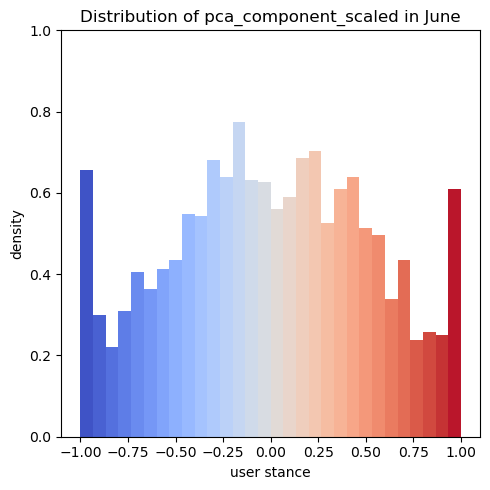

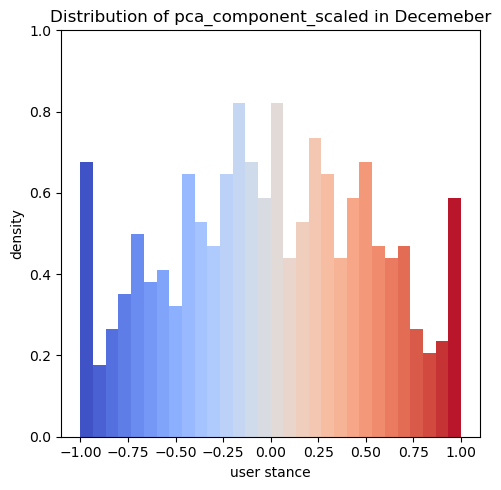

In [9]:
plot_c_subplot_colored(june_df, ["pca_component_scaled"], month = "June", num_plots=1, y_lim = 1)
plot_c_subplot_colored(dec_df, ["pca_component_scaled"], month = "Decemeber", num_plots=1, y_lim = 1)

### Networks colored by scaled principal component  

In [3]:
june_df.columns

Index(['Unnamed: 0', 'user', 'A_x', 'F_x', 'N_x', 'stance_abortion', 'A_y',
       'F_y', 'N_y', 'stance_marriage', 'A', 'F', 'N', 'stance_political',
       'stance_political_scaled', 'stance_abortion_scaled',
       'stance_marriage_scaled', 'pca_component', 'umap_component', 'nodeid',
       'pca_component_scaled', 'pca_component1', 'pca_component2',
       'umap_component1', 'umap_component2', 'pca1_scaled', 'pca2_scaled'],
      dtype='object')

In [4]:
attr_dict_june = june_df.set_index('nodeid')[['stance_marriage', 'stance_political', 'stance_abortion', "pca_component_scaled", "umap_component", "pca_component"]].to_dict(orient='index')
attr_dict_dec = dec_df.set_index('nodeid')[['stance_marriage', 'stance_political', 'stance_abortion', "pca_component_scaled", "umap_component", "pca_component"]].to_dict(orient='index')

In [12]:
# june_dict = june_df.set_index('nodeid')['pca_component_scaled'].to_dict()
# dec_dict  = dec_df.set_index('nodeid')['pca_component_scaled'].to_dict()

In [5]:
net_file_june = pd.read_csv("../output_network/network_filtered_june.csv", sep="\t")
G_june = nx.from_pandas_edgelist(net_file_june, "src", "trg")
print(G_june)

Graph with 2514 nodes and 23700 edges


In [6]:
net_file_dec = pd.read_csv("../output_network/network_filtered.csv", sep="\t")
G_dec = nx.from_pandas_edgelist(net_file_dec, "src", "trg")
print(G_dec)

Graph with 511 nodes and 2785 edges


In [7]:
# setting the attributes 
nx.set_node_attributes(G_june, attr_dict_june)
nx.set_node_attributes(G_dec, attr_dict_dec)
print(G_june.nodes[911729]['pca_component_scaled'])
print(G_dec.nodes[1232857]['pca_component_scaled'])

-0.3719542900291201
0.053076728245611


In [8]:
# checks 
print(june_df[june_df["nodeid"] == 911729]["pca_component_scaled"])
print(dec_df[dec_df["nodeid"] == 1232857]["pca_component_scaled"])

0   -0.371954
Name: pca_component_scaled, dtype: float64
0    0.053077
Name: pca_component_scaled, dtype: float64


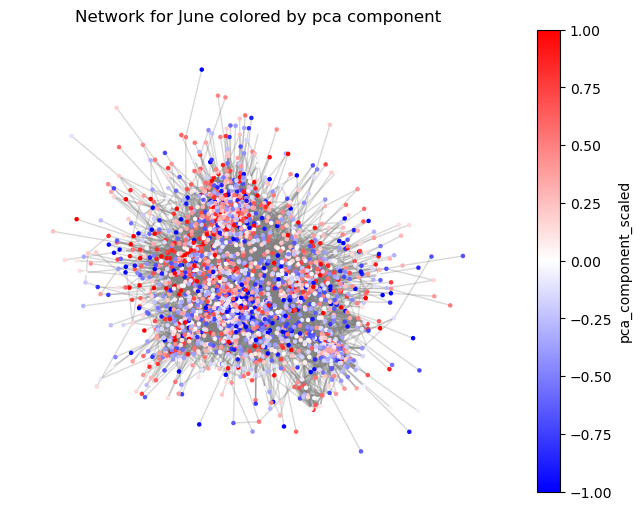

In [9]:
from matplotlib.cm import ScalarMappable

# Get the pol_score values for all nodes (default to 0 if missing)
values = [G_june.nodes[n].get("pca_component_scaled", 0) for n in G_june.nodes]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
pos = nx.spring_layout(G_june, seed=42)  # Or any other layout
nx.draw(
    G_june, pos,
    node_color=values,
    cmap=plt.cm.bwr,   # Red-white-blue colormap (seismic, bwr, coolwarm)
    edge_color=(0.5, 0.5, 0.5, 0.3), 
    node_size=5,
    ax = ax
)

sm = ScalarMappable(cmap=plt.cm.bwr)
sm.set_array(values)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("pca_component_scaled")
plt.title("Network for June colored by pca component")
plt.show()

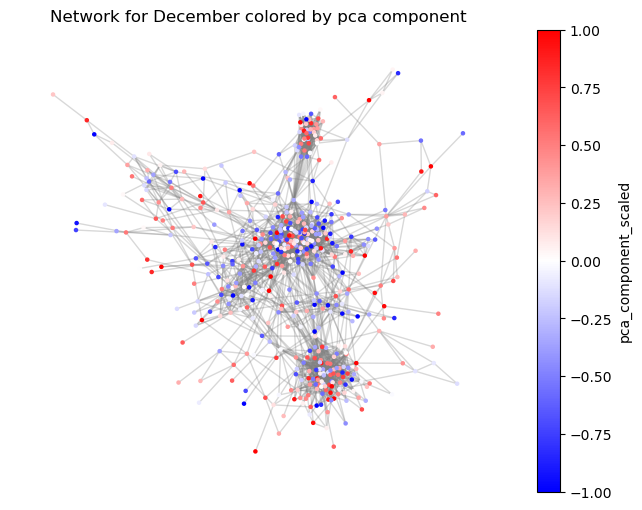

In [18]:
from matplotlib.cm import ScalarMappable

# Get the pol_score values for all nodes (default to 0 if missing)
values = [G_dec.nodes[n].get("pca_component_scaled", 0) for n in G_dec.nodes]

fig, ax = plt.subplots(figsize=(8, 6))

# Plot
pos = nx.spring_layout(G_dec, seed=42)  # Or any other layout
nx.draw(
    G_dec, pos,
    node_color=values,
    cmap=plt.cm.bwr,   # Red-white-blue colormap
    edge_color=(0.5, 0.5, 0.5, 0.3), #sets edge color to gray by first 3 numbers (RGB) and the 4th number is the opacity from 0 (transparent) to 1 (opaque)
    node_size=5,
    ax = ax
)

sm = ScalarMappable(cmap=plt.cm.bwr)
sm.set_array(values)
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label("pca_component_scaled")
plt.title("Network for December colored by pca component")
plt.show()

In [19]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.cm import ScalarMappable

def plot_graph_colored_by_attributes(G, attributes, cmap=plt.cm.bwr, num_plots = 3):
    """
    Plots the same graph in 3 subplots colored by different node attributes.

    Parameters:
    - G: NetworkX graph
    - attributes: List of 3 node attribute names to color by
    - cmap: Colormap (default: bwr)
    """

    fig, axes = plt.subplots(1, num_plots, figsize=(18, 6), constrained_layout=True)
    pos = nx.spring_layout(G, seed=42)

    for i, attr in enumerate(attributes):
        values = [G.nodes[n].get(attr, 0) for n in G.nodes]
        ax = axes[i]

        nx.draw(
            G, pos,
            node_color=values,
            cmap=cmap,
            edge_color=(0.5, 0.5, 0.5, 0.3),
            node_size=5,
            ax=ax
        )

        sm = ScalarMappable(cmap=cmap)
        sm.set_array(values)
        cbar = plt.colorbar(sm, ax=ax, shrink=0.8)
        cbar.set_label(attr)

        ax.set_title(f"Colored by {attr}")
        ax.axis("off")

    plt.suptitle("Network Colored by Different Node Attributes", fontsize=16)
    plt.show()

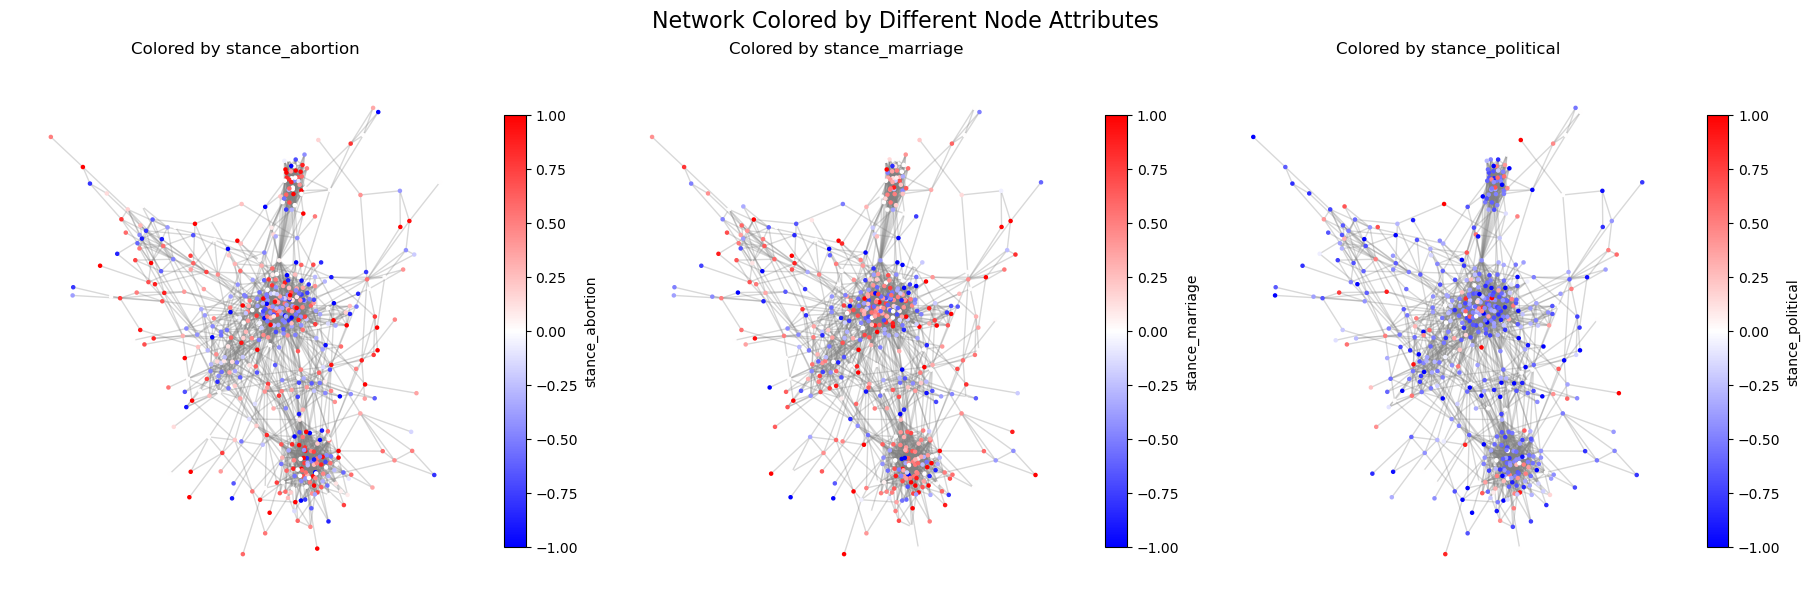

In [20]:
plot_graph_colored_by_attributes(G_dec, ["stance_abortion", "stance_marriage", "stance_political"]) 

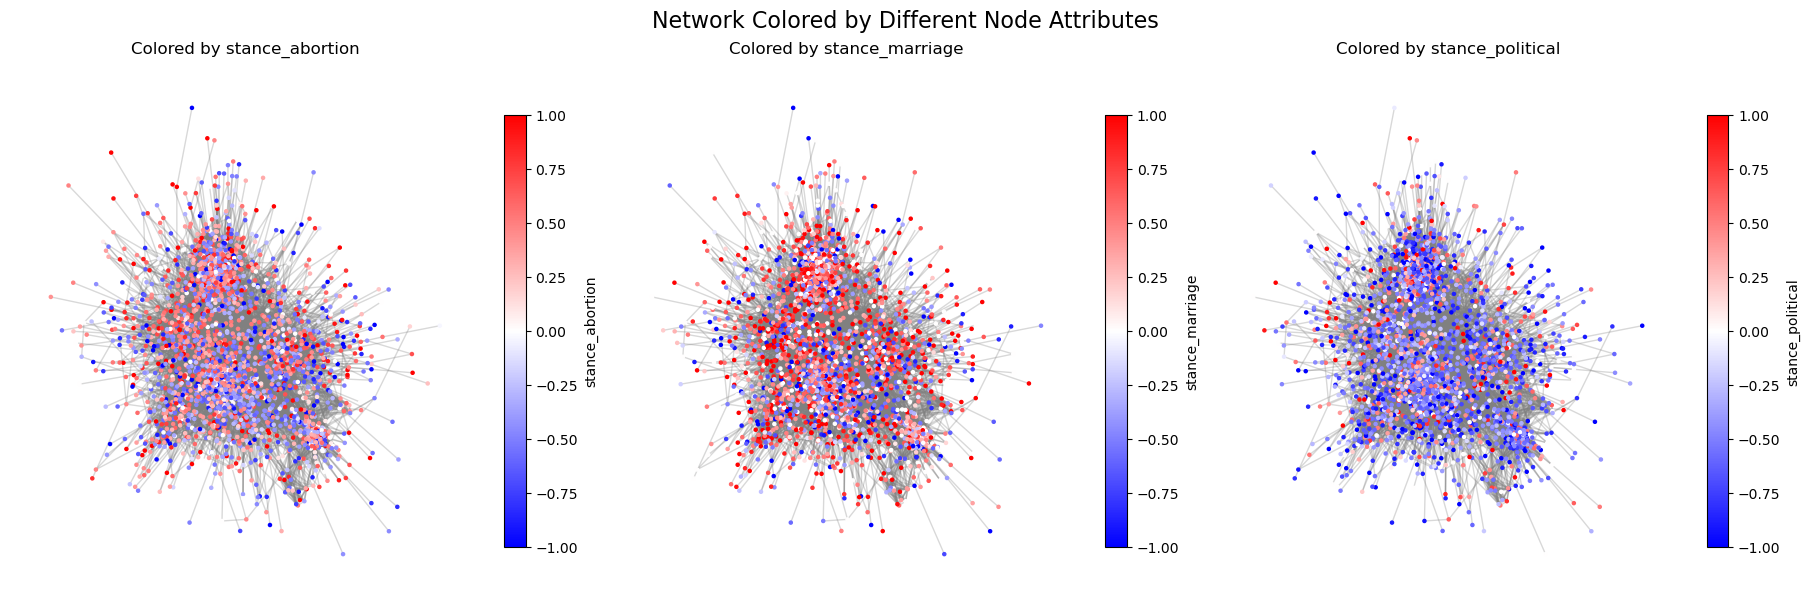

In [21]:
plot_graph_colored_by_attributes(G_june, ["stance_abortion", "stance_marriage", "stance_political"]) 

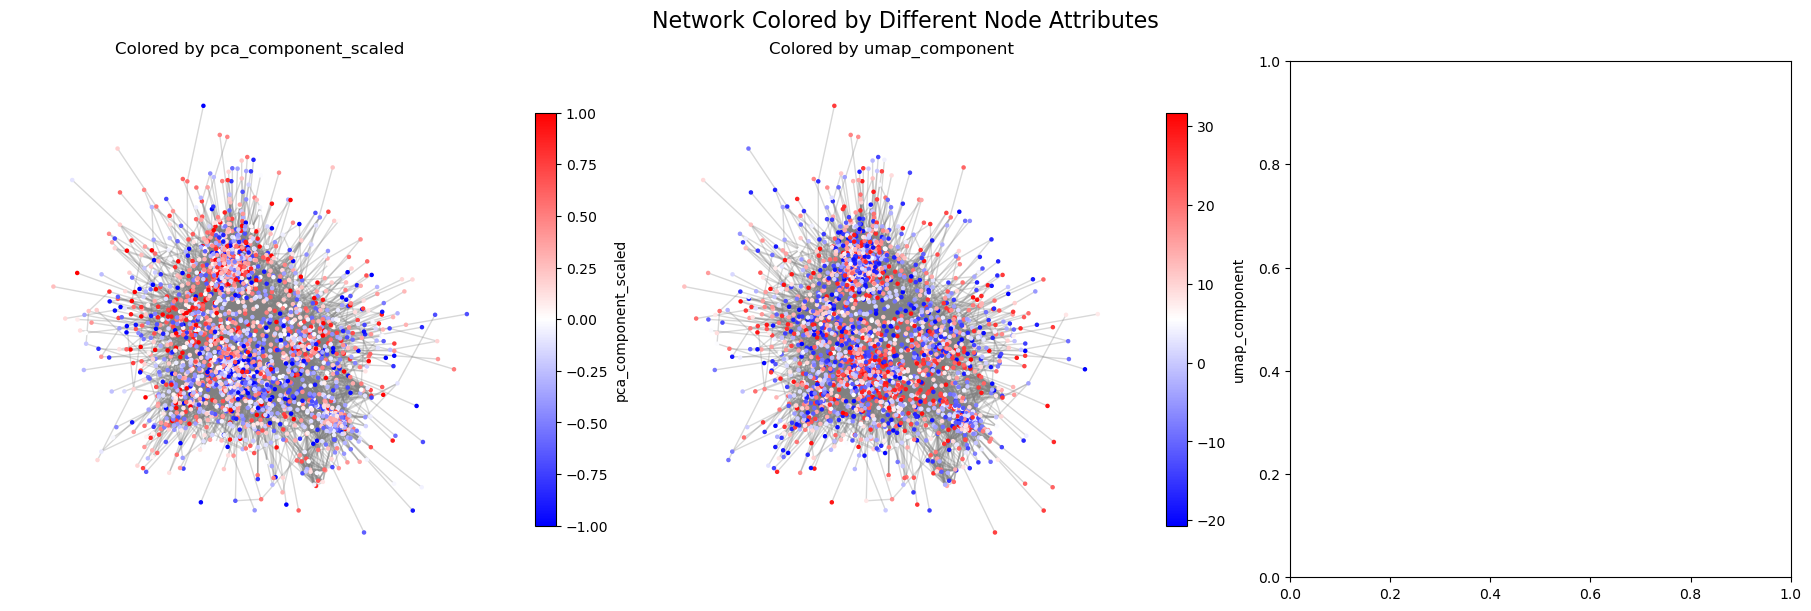

In [22]:
plot_graph_colored_by_attributes(G_june, ['pca_component_scaled', 'umap_component']) 

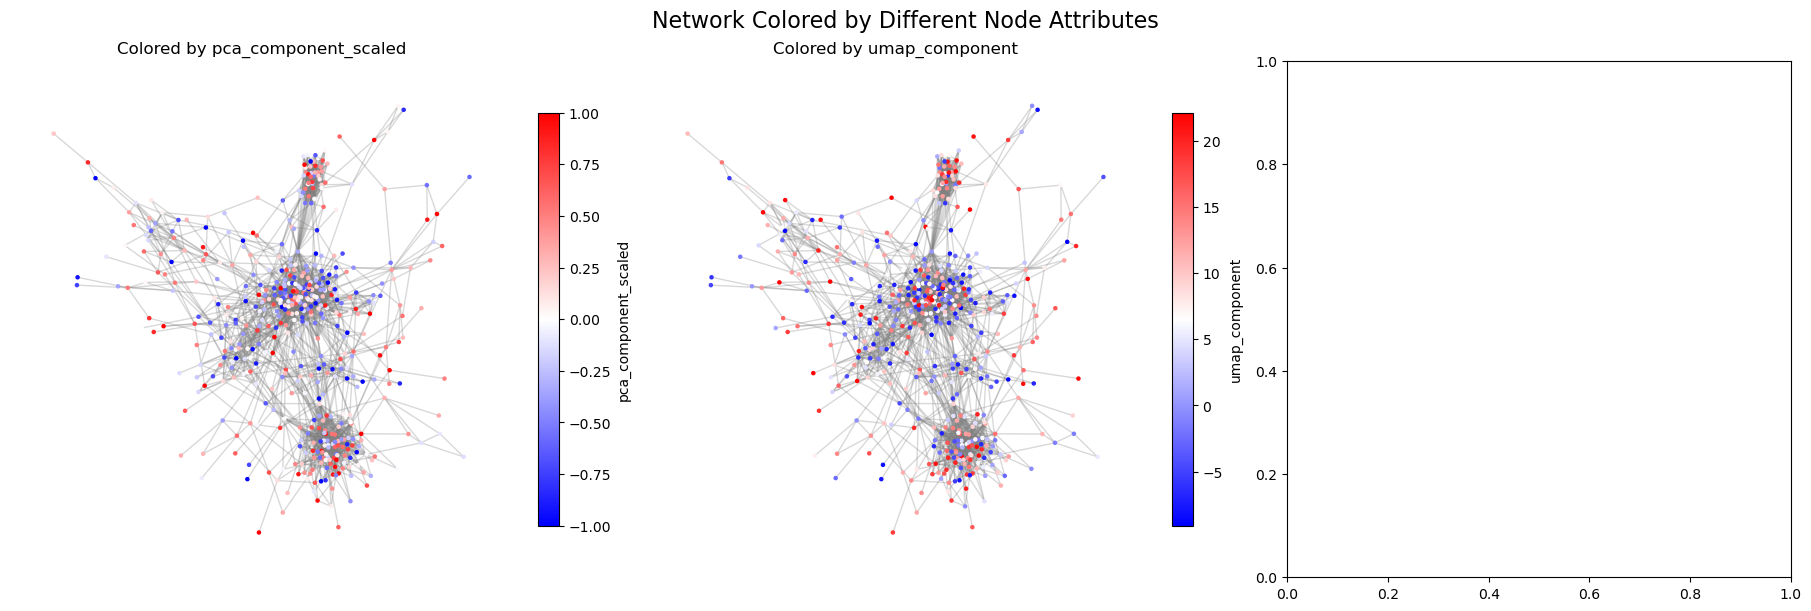

In [23]:
plot_graph_colored_by_attributes(G_dec, ['pca_component_scaled', 'umap_component']) 

##### Homophily

In [10]:
print("Homophily pca scaled:", nx.numeric_assortativity_coefficient(G_june, "pca_component_scaled", nodes=None), "\n")
print("Homophily pca:", nx.numeric_assortativity_coefficient(G_june, "pca_component", nodes=None), "\n")
print("Homophily abortion", nx.numeric_assortativity_coefficient(G_june, "stance_abortion", nodes=None), "\n")
print("Homophily marriage", nx.numeric_assortativity_coefficient(G_june, "stance_marriage", nodes=None), "\n")
print("Homophily political", nx.numeric_assortativity_coefficient(G_june, "stance_political", nodes=None), "\n")

Homophily pca scaled: 0.018635758246730184 

Homophily pca: 0.01809830065552972 

Homophily abortion -0.007388072128684736 

Homophily marriage 0.01054736274212687 

Homophily political 0.0076022660826273614 



In [11]:
print("Homophily pca scaled:", nx.numeric_assortativity_coefficient(G_dec, "pca_component_scaled", nodes=None), "\n")
print("Homophily pca :", nx.numeric_assortativity_coefficient(G_dec, "pca_component", nodes=None), "\n")
print("Homophily abortion", nx.numeric_assortativity_coefficient(G_dec, "stance_abortion", nodes=None), "\n")
print("Homophily marriage", nx.numeric_assortativity_coefficient(G_dec, "stance_marriage", nodes=None), "\n")
print("Homophily political", nx.numeric_assortativity_coefficient(G_dec, "stance_political", nodes=None), "\n")

Homophily pca scaled: -0.048251945101416206 

Homophily pca : -0.052035715668274064 

Homophily abortion -0.024214038898217733 

Homophily marriage -0.011372459959433876 

Homophily political -0.012073002645165035 



## Network analysis

- number of nodes, edges
- average degree
- max, min degree
- degree distributions??
- clustering coefficient

In [26]:
print(f"June {G_june} \n December {G_dec}")

June Graph with 2514 nodes and 23700 edges 
 December Graph with 511 nodes and 2785 edges


In [27]:
#Average degree
avg_degreeJ = sum(dict(G_june.degree()).values()) / G_june.number_of_nodes()
avg_degreeD = sum(dict(G_dec.degree()).values()) / G_dec.number_of_nodes()

print("Average degree June:", avg_degreeJ)
print("Average degree December:", avg_degreeD)

Average degree June: 18.85441527446301
Average degree December: 10.900195694716242


In [28]:
#Max and min degrees
print(f"Max degree June: {max(dict(G_june.degree()).values())}, Min degree: {min(dict(G_june.degree()).values())}")
print(f"Max degree Dec: {max(dict(G_dec.degree()).values())}, Min degree: {min(dict(G_june.degree()).values())}")

Max degree June: 161, Min degree: 1
Max degree Dec: 50, Min degree: 1


In [29]:
#Betweenness centrality
print("Betweenness centrality June: ", np.mean(list(nx.betweenness_centrality(G_june).values())))
print("Betweenness centrality December: ", np.mean(list(nx.betweenness_centrality(G_dec).values())))

Betweenness centrality June:  0.0010281598192880695
Betweenness centrality December:  0.005314537473627124


In [30]:
print(f"Average clustering for June graph: {nx.average_clustering(G_june)}")
print(f"Average clustering for December graph: {nx.average_clustering(G_dec)}")

Average clustering for June graph: 0.14912865628041622
Average clustering for December graph: 0.24321261067025826


In [32]:
print(f"Average path length for June graph: {nx.average_shortest_path_length(G_june)}")
print(f"Average path length for December graph: {nx.average_shortest_path_length(G_dec)}")

Average path length for June graph: 3.582737466051631
Average path length for December graph: 3.705099574076206


### Anlysis of the data 

##### Comparing standard deviation between months: 


December has a slightly lower standard deviation in 3/4 columns -> could mean that opinions are slightly more moderate/similar 
- Might be too little difference to say anything concrete though

In [32]:
np.std(june_df["pca_component_scaled"]), np.std(dec_df["pca_component_scaled"])


(np.float64(0.5276185759763007), np.float64(0.5275708930472016))

In [33]:
np.std(june_df["stance_abortion"]), np.std(dec_df["stance_abortion"])


(np.float64(0.5547492065586641), np.float64(0.5863709776497606))

In [34]:
np.std(june_df["stance_marriage"]), np.std(dec_df["stance_marriage"])

(np.float64(0.5960448004910552), np.float64(0.5680417127368909))

In [35]:
np.std(june_df["stance_political"]), np.std(dec_df["stance_political"])

(np.float64(0.5244130985484288), np.float64(0.4613735999300244))

##### Opinion distribution shape

In [36]:
from scipy.stats import kurtosis, skew
pca_scores_june = nx.get_node_attributes(G_june, "pca_component_scaled").values()
pca_scores_dec = nx.get_node_attributes(G_dec, "pca_component_scaled").values()

scores_june = np.array(list(pca_scores_june))
scores_dec = np.array(list(pca_scores_dec))

print("June std:", scores_june.std())
print("June kurtosis:", kurtosis(scores_june))
print("June skew:", skew(scores_june))

print("Dec std:", scores_dec.std())
print("Dec kurtosis:", kurtosis(scores_dec))
print("Dec skew:", skew(scores_dec))

June std: 0.5276185759763007
June kurtosis: -0.8062984013065089
June skew: -0.02594121878347977
Dec std: 0.5275708930472016
Dec kurtosis: -0.8458319736186692
Dec skew: -0.03613449150303956


##### Average opinion difference across endges 

In [37]:
# june 
import numpy as np

opinion_diff = []
for u, v in G_june.edges():
    diff = abs(G_june.nodes[u]['pca_component_scaled'] - G_june.nodes[v]['pca_component_scaled'])
    opinion_diff.append(diff)

mean_diff = np.mean(opinion_diff)
print(f"Average opinion difference across edges: {mean_diff:.3f}")

Average opinion difference across edges: 0.568


In [38]:
# dec 
import numpy as np

opinion_diff = []
for u, v in G_dec.edges():
    diff = abs(G_dec.nodes[u]['pca_component_scaled'] - G_dec.nodes[v]['pca_component_scaled'])
    opinion_diff.append(diff)

mean_diff = np.mean(opinion_diff)
print(f"Average opinion difference across edges: {mean_diff:.3f}")

Average opinion difference across edges: 0.604


##### Network centrality of extreme opinions 


In [39]:
pca_scores = nx.get_node_attributes(G_dec, "pca_component_scaled")
extremes = {node: score for (node, score) in pca_scores.items() if np.abs(score) > 0.8 }

In [40]:
centralities = nx.degree_centrality(G_dec)


In [41]:
centralities = {node: centrality for node, centrality in centralities.items() if node in extremes}

In [42]:
pca_scores = nx.get_node_attributes(G_dec, "pca_component_scaled")
pca_scores

{798787: -0.1139617572082115,
 254684: -0.596345983177834,
 15548: 0.5228313725746613,
 430231: 0.1054142756364723,
 1209510: 0.2338590759816162,
 410689: -0.2691074612232002,
 695649: -0.010020232196979,
 419460: 0.395423978544367,
 1234244: 0.5219067570577762,
 520690: -0.044488276263954,
 972375: 0.203316697525746,
 521147: -0.1504114204978992,
 357231: 0.5275939821450382,
 706029: 0.0782130747862536,
 608682: -0.2312552501628725,
 1195573: 0.8336229395990129,
 494890: -0.5342154813723496,
 146354: -0.0034735250186879,
 1032836: 0.9837645822067744,
 1132377: 0.4807799276470512,
 1137789: 0.4146024017253428,
 748633: 0.7296466821709806,
 21729: 0.0654377601884905,
 1220350: 0.785410146437157,
 1035996: -0.1983113432721082,
 305666: 0.5105026171408449,
 1230484: -0.020591931354448,
 1153602: -0.589948810956636,
 1232506: 0.9128115825461736,
 1224593: -0.5372039584966967,
 565896: 0.5885927144591929,
 747924: 0.1666533701309363,
 126762: 0.3890994859938841,
 164809: -0.2844861166281011

In [43]:
def get_centrality(network, column, threshold): 
    pca_scores = nx.get_node_attributes(network, column)
    extremes = {node: np.abs(score) for (node, score) in pca_scores.items() if np.abs(score) > threshold }
    centralities = nx.betweenness_centrality(network)
    extreme_centralities = {node: centrality for node, centrality in centralities.items() if node in extremes}
    extreme_centrality = np.mean(list(extreme_centralities.values()))
    return extreme_centrality

In [44]:
get_centrality(G_dec, "pca_component_scaled", 0.6) 

np.float64(0.004571270363149079)

In [45]:
get_centrality(G_june, "pca_component_scaled", 0.6)

np.float64(0.0009707914170776992)

In [46]:
def line_plot(network, column):
    pca_scores = nx.get_node_attributes(network, column).values()
    centrality = list(nx.betweenness_centrality(network).values())

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_scores, centrality, alpha=0.6)
    plt.xlabel('Opinion Extremeness (|PCA score|)')
    plt.ylabel('Betweenness Centrality')
    plt.title('Betweenness vs Centrality')
    plt.show()

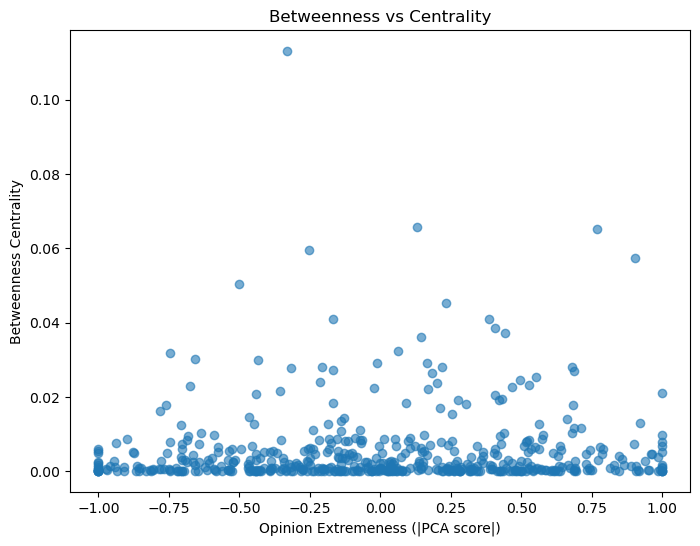

In [47]:
line_plot(G_dec, "pca_component_scaled")

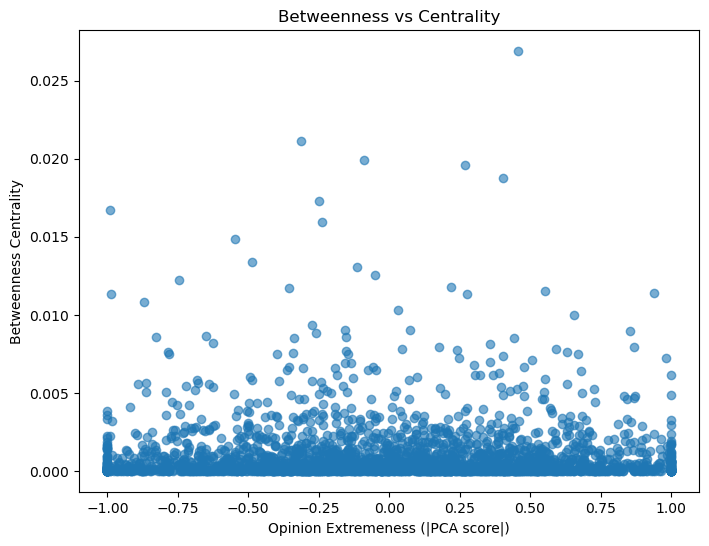

In [48]:
line_plot(G_june, "pca_component_scaled")

In [49]:
def box_plot(network):
    data = pd.DataFrame({
    'extremeness': nx.get_node_attributes(network, "pca_component_scaled").values(),
    'centrality': list(nx.degree_centrality(network).values())
})
    data['bin'] = pd.cut(data['extremeness'], bins=np.linspace(0, 1, 6))

    data.boxplot(column='centrality', by='bin', grid=False)
    plt.title('Centrality by Opinion Extremeness')
    plt.suptitle('')
    plt.xlabel('Opinion Extremeness Bin')
    plt.ylabel('Degree Centrality')
    plt.show()

##### Community detection

In [50]:
import community.community_louvain as community_louvain
import networkx as nx
import numpy as np

# Run community detection
partition = community_louvain.best_partition(G_june)

# Attach opinions
opinions = nx.get_node_attributes(G_june, 'pca_component_scaled')

# Group by community and measure opinion spread
from collections import defaultdict

community_opinions = defaultdict(list)
for node, comm_id in partition.items():
    if node in opinions:
        community_opinions[comm_id].append(opinions[node])

# Compute variance per community
variances = {comm: np.var(scores) for comm, scores in community_opinions.items()}
avg_variance = np.mean(list(variances.values()))
avg_variance

np.float64(0.26286959517888975)

In [51]:
# Run community detection
partition = community_louvain.best_partition(G_dec)

# Attach opinions
opinions = nx.get_node_attributes(G_dec, 'pca_component_scaled')

# Group by community and measure opinion spread
from collections import defaultdict

community_opinions = defaultdict(list)
for node, comm_id in partition.items():
    if node in opinions:
        community_opinions[comm_id].append(opinions[node])

# Compute variance per community
variances = {comm: np.var(scores) for comm, scores in community_opinions.items()}
avg_variance = np.mean(list(variances.values()))
avg_variance

np.float64(0.22129944812913843)

#### Similarity of networks

In [52]:
from scipy.stats import ks_2samp

pca_scores_june = june_df["pca_component_scaled"].tolist()
pca_scores_dec = dec_df["pca_component_scaled"].tolist()

stat, p_value = ks_2samp(list(pca_scores_june), list(pca_scores_dec))
print("KS statistic:", stat)
print("p-value:", p_value)

KS statistic: 0.017102659548796795
p-value: 0.9994515709388527


In [53]:
pca_scores_un_june = june_df["pca_component"].tolist()
pca_scores_un_dec = dec_df["pca_component"].tolist()

stat, p_value = ks_2samp(list(pca_scores_un_june), list(pca_scores_un_dec))
print("KS statistic:", stat)
print("p-value:", p_value)

KS statistic: 0.017102659548796795
p-value: 0.9994515709388527


##### Modularity + communities

In [54]:
# Run Label Propagation algorithm
from networkx.algorithms.community.quality import modularity

def community_detection(G):
    communities_lp = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    communities_louvain = nx.algorithms.community.louvain_communities(G)
    communities_greedy_mod = nx.algorithms.community.greedy_modularity_communities(G)

    # Convert communities to a list for better visualization
    communities_list_lp = [list(community) for community in communities_lp]
    communities_list_louvain = [list(community) for community in communities_louvain]
    communities_list_gm = [list(community) for community in communities_greedy_mod]

    print(f"Number of commmunities with label prop. algorithm: {len(communities_list_lp)}")
    print(f"Number com. Louvain: {len(communities_list_louvain)}")
    print(f"Number com. greedy modularity: {len(communities_list_gm)}")

    print("##################")

    modularity_lp = modularity(G, communities_list_lp)
    modularity_louvain = modularity(G, communities_list_louvain) #the chosen one
    modularity_gm = modularity(G, communities_list_gm)
    print(f"Modularity label prop.: {modularity_lp}")
    print(f"Louvain: {modularity_louvain}")
    print(f"Greedy modularity: {modularity_gm}")

    # Print the detected communities
    # print("Detected Communities:")
    # for i, community in enumerate(communities_list):
    #     print(f"Community {i + 1}: {community}")

In [55]:
community_detection(G_june)

Number of commmunities with label prop. algorithm: 47
Number com. Louvain: 9
Number com. greedy modularity: 12
##################
Modularity label prop.: 0.6680547054425037
Louvain: 0.6881429881251223
Greedy modularity: 0.6388741547828876


In [56]:
community_detection(G_dec)

Number of commmunities with label prop. algorithm: 23
Number com. Louvain: 8
Number com. greedy modularity: 7
##################
Modularity label prop.: 0.5933739673616997
Louvain: 0.6498266875960921
Greedy modularity: 0.5911159101238037


##### Degree distributions 

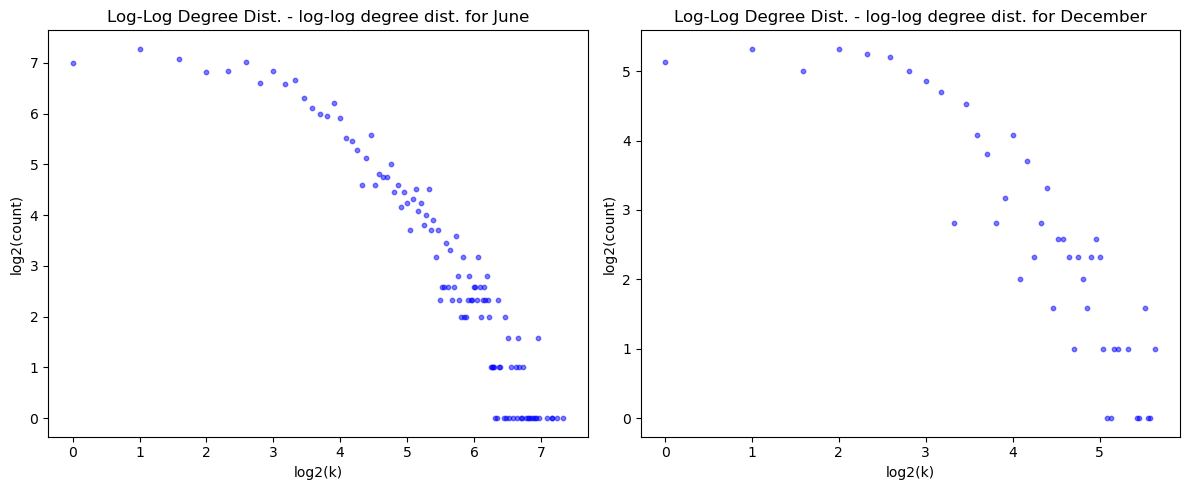

In [57]:

from collections import Counter 

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
def logscatter_dual(G1, G2, labels=("Graph 1", "Graph 2")):
    def get_degree_df(G):
        d = dict(G.degree)
        counter = Counter(d.values())
        return pd.DataFrame(list(counter.items()), columns=("k", "count")).sort_values(by="k")

    df1 = get_degree_df(G1)
    df2 = get_degree_df(G2)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    for ax, df, label in zip(axes, [df1, df2], labels):
        ax.scatter(np.log2(df['k']), np.log2(df['count']), c='blue', s=10, alpha=0.5)
        ax.set_title(f"Log-Log Degree Dist. - {label}")
        ax.set_xlabel("log2(k)")
        ax.set_ylabel("log2(count)")
    
    plt.tight_layout()
    plt.savefig("loglog_degree_distribution_dual.png")
    plt.show()

logscatter_dual(G_june, G_dec, labels=("log-log degree dist. for June", "log-log degree dist. for December"))

#### Book version of opinion homophily 

You iterate over all the edges in the network and put into two vectors the scores of
the nodes at the two endpoints. Note that each edge contributes two entries to this vector – unless your network is directed. So, if your network only contains a single edge connecting nodes 1 and 2, your two vectors are x = [k1, k2] and y = [k2, k1], with kv being the score of node v. Then, assortativity is simply the Pearson correlation coefficient of these two vectors.

In [12]:
v1_dec = []
v2_dec = []
for index,row in net_file_dec.iterrows():
    # get the scores for src and trg nodes: 
    src = int(row["src"])
    src_score = attr_dict_dec[src]["pca_component_scaled"]
    trg = int(row["trg"])
    trg_score = attr_dict_dec[trg]["pca_component_scaled"]

    # add to the vectors: 
    v1_dec.extend([src_score, trg_score])
    v2_dec.extend([trg_score, src_score])

print(v1_dec)
print(v2_dec)

[-0.1139617572082115, -0.596345983177834, 0.5228313725746613, 0.1054142756364723, 0.2338590759816162, -0.2691074612232002, 0.2338590759816162, -0.010020232196979, 0.395423978544367, 0.5219067570577762, 0.395423978544367, -0.044488276263954, 0.395423978544367, 0.203316697525746, 0.395423978544367, -0.1504114204978992, 0.395423978544367, 0.5275939821450382, 0.395423978544367, 0.0782130747862536, 0.395423978544367, -0.2312552501628725, 0.8336229395990129, -0.5342154813723496, 0.8336229395990129, -0.0034735250186879, 0.8336229395990129, -0.044488276263954, 0.8336229395990129, 0.9837645822067744, 0.8336229395990129, 0.4807799276470512, 0.8336229395990129, 0.4146024017253428, 0.8336229395990129, 0.203316697525746, 0.8336229395990129, 0.7296466821709806, 0.8336229395990129, 0.0654377601884905, 0.8336229395990129, 0.785410146437157, -0.5342154813723496, -0.0034735250186879, -0.5342154813723496, -0.1983113432721082, -0.5342154813723496, 0.5105026171408449, -0.5342154813723496, -0.02059193135444

In [13]:
res_dec = stats.pearsonr(v1_dec, v2_dec)
res_dec

PearsonRResult(statistic=np.float64(-0.0599214365052393), pvalue=np.float64(4.291113375926957e-07))

Final function: 

In [14]:
def get_opinion_vectors(net_file, dict_file): 
    # getting the vectors: 

    v1 = []
    v2 = []
    for index,row in net_file.iterrows():
        # get the scores for src and trg nodes: 
        src = int(row["src"])
        src_score = dict_file[src]["pca_component_scaled"]
        trg = int(row["trg"])
        trg_score = dict_file[trg]["pca_component_scaled"]

        # add to the vectors: 
        v1.extend([src_score, trg_score])
        v2.extend([trg_score, src_score])
    res = stats.pearsonr(v1, v2)
    return res

res_dec = get_opinion_vectors(net_file_dec, attr_dict_dec)
res_june = get_opinion_vectors(net_file_june, attr_dict_june)
print("dec: ",  res_dec)
print("june: ",  res_june)

dec:  PearsonRResult(statistic=np.float64(-0.0599214365052393), pvalue=np.float64(4.291113375926957e-07))
june:  PearsonRResult(statistic=np.float64(0.013269743506905275), pvalue=np.float64(0.0016208473128667942))


In [15]:
def get_opinion_vectors_unscaled(net_file, dict_file): 
    # getting the vectors: 

    v1 = []
    v2 = []
    for index,row in net_file.iterrows():
        # get the scores for src and trg nodes: 
        src = int(row["src"])
        src_score = dict_file[src]["pca_component"]
        trg = int(row["trg"])
        trg_score = dict_file[trg]["pca_component"]

        # add to the vectors: 
        v1.extend([src_score, trg_score])
        v2.extend([trg_score, src_score])
    res = stats.pearsonr(v1, v2)
    return res

res_dec_unscaled = get_opinion_vectors_unscaled(net_file_dec, attr_dict_dec)
res_june_unscaled = get_opinion_vectors_unscaled(net_file_june, attr_dict_june)
print("dec: ",  res_dec_unscaled)
print("june: ",  res_june_unscaled)

dec:  PearsonRResult(statistic=np.float64(-0.0626753759471938), pvalue=np.float64(1.2341409829100215e-07))
june:  PearsonRResult(statistic=np.float64(0.012462231524055595), pvalue=np.float64(0.0030734458251755743))


##### Statistical significance of modularity values: 

In [13]:
import networkx as nx
import random
import numpy as np
import community as community_louvain  # python-louvain

def compute_modularity(G):
    partition = community_louvain.best_partition(G)
    return community_louvain.modularity(partition, G)

def permute_edges(G1, G2):
    """
    Combine edges from both graphs, shuffle, and reassign to two new graphs
    with the same number of edges as original G1 and G2.
    """
    edges1 = list(G1.edges())
    edges2 = list(G2.edges())
    combined_edges = edges1 + edges2
    random.shuffle(combined_edges)

    G1_perm = nx.Graph()
    G2_perm = nx.Graph()
    G1_perm.add_nodes_from(G1.nodes())
    G2_perm.add_nodes_from(G2.nodes())
    
    G1_perm.add_edges_from(combined_edges[:len(edges1)])
    G2_perm.add_edges_from(combined_edges[len(edges1):])
    
    return G1_perm, G2_perm

def permutation_test(G1, G2, n_permutations=1000, seed=42):
    random.seed(seed)
    np.random.seed(seed)

    Q1 = compute_modularity(G1)
    Q2 = compute_modularity(G2)
    delta_Q_obs = Q1 - Q2

    delta_Q_perm = []

    for _ in range(n_permutations):
        G1_perm, G2_perm = permute_edges(G1, G2)
        try:
            Q1_perm = compute_modularity(G1_perm)
            Q2_perm = compute_modularity(G2_perm)
            delta_Q_perm.append(Q1_perm - Q2_perm)
        except:
            # Some permutations might create disconnected graphs or issues
            continue

    p_value = sum(abs(dq) >= abs(delta_Q_obs) for dq in delta_Q_perm) / len(delta_Q_perm)

    print(f"Q1 = {Q1:.4f}, Q2 = {Q2:.4f}")
    print(f"Observed ΔQ = {delta_Q_obs:.4f}")
    print(f"P-value = {p_value:.4f}")
    return delta_Q_obs, delta_Q_perm, p_value

# EXAMPLE USAGE
# Create two random graphs (you can replace these with your real networks)


permutation_test(G_june, G_dec, n_permutations=1000)


Q1 = 0.6888, Q2 = 0.6502
Observed ΔQ = 0.0386
P-value = 1.0000


(0.03859443887484404,
 [-0.08570431506901144,
  -0.09094939682026304,
  -0.09346708854580399,
  -0.09653684666905415,
  -0.09035590386727332,
  -0.08845053863369479,
  -0.08936803436899632,
  -0.09155830619810335,
  -0.0974922027313907,
  -0.09776300487132938,
  -0.0844944998732593,
  -0.087753258561314,
  -0.09025108952534244,
  -0.09361394890132269,
  -0.10052945673306068,
  -0.09225646397416043,
  -0.08800994096061487,
  -0.09008384459169216,
  -0.10422740296038613,
  -0.0892394191157323,
  -0.08784854662440433,
  -0.09443257229925373,
  -0.09727408112518388,
  -0.08990519029632871,
  -0.08554200827371783,
  -0.088851132179669,
  -0.08087363364130107,
  -0.10099628307197073,
  -0.09059456155830792,
  -0.088928527995626,
  -0.09726108650791798,
  -0.08351178416449945,
  -0.09141790064361088,
  -0.08914376004730595,
  -0.0830772513864213,
  -0.09141771904962215,
  -0.09105845106446508,
  -0.09552440297997766,
  -0.08774507022447964,
  -0.08964833895204172,
  -0.08756836983506666,
  -0